In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import category_encoders as ce
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
Ames = pd.read_csv('AmesHousing.csv')
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')

In [7]:
cols_dic = dict(Ames_cols = Ames.columns,
               Train_cols = Train.columns,
               Test_cols = Test.columns)
cols_df = pd.DataFrame.from_dict(cols_dic, orient='index').transpose()
cols_df

,Ames_cols,Train_cols,Test_cols
0,Order,Id,Id
1,PID,MSSubClass,MSSubClass
2,MS SubClass,MSZoning,MSZoning
3,MS Zoning,LotFrontage,LotFrontage
4,Lot Frontage,LotArea,LotArea
5,Lot Area,Street,Street
6,Street,Alley,Alley
7,Alley,LotShape,LotShape
8,Lot Shape,LandContour,LandContour
9,Land Contour,Utilities,Utilities


In [8]:
Ames = Ames.drop(['Order', 'PID'], axis = 1)
Train = Train.drop('Id', axis = 1)

In [9]:
# Draw the column names of the two dictionaries together
cols_dic = dict(zip(Ames.columns, Train.columns))
# Use the dictionary to blanket rename the columns in the Ames dictionary
Ames = Ames.rename(columns=cols_dic)
# Concatenate the two datasets together to create a large training set
df_train = pd.concat([Train, Ames])

In [15]:
df_train = df_train.drop_duplicates()
df_train = df_train.reset_index(drop=True)
df_train['Id'] = range(len(df_train))
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Id
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,3
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4192,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500,4192
4193,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000,4193
4194,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000,4194
4195,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,N

In [16]:
df_test = Test.copy()

## EDA

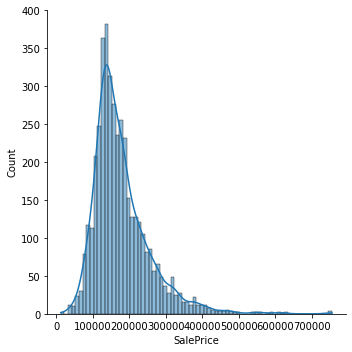

In [17]:
sns.displot(df_train['SalePrice'], kde = True)

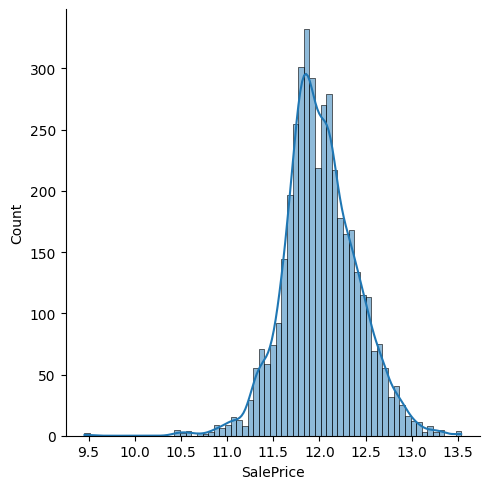

In [18]:
df_train['SalePrice'] = df_train['SalePrice'].apply(np.log)
sns.displot(df_train['SalePrice'], kde = True)

In [19]:
all_data = pd.concat([df_train.drop('SalePrice', axis = 1), df_test])

## Missing Data

In [20]:
def miss_data(data):
    miss_df = ((data == 0).sum()).to_frame()
    miss_df = miss_df.rename(columns = {0: 'zeros'})
    miss_df.index.name = 'Feature'
    miss_df['np.nan'] = (data.isnull()).sum()
    miss_df['None'] = (data == "None").sum()
    miss_df['total'] = miss_df['zeros'] + miss_df['np.nan'] + miss_df['None']
    miss_df['Percent'] = 100*miss_df['total']/len(data)
    miss_df['Type'] = [data[i].dtype for i in miss_df.index ]
    return    miss_df.sort_values(ascending = False, by = 'Percent')

In [21]:
miss_data(all_data)

,zeros,np.nan,None,total,Percent,Type
Feature,,,,,,
PoolQC,0,5634,0,5634,99.611033,object
PoolArea,5631,0,0,5631,99.557992,int64
3SsnPorch,5587,0,0,5587,98.780057,int64
LowQualFinSF,5577,0,0,5577,98.603253,int64
MiscVal,5454,0,0,5454,96.428571,int64
MiscFeature,0,5450,0,5450,96.357850,object
BsmtHalfBath,5309,4,0,5313,93.935644,float64
Alley,0,5272,0,5272,93.210750,object
ScreenPorch,5156,0,0,5156,91.159830,int64


In [22]:
cat_feat = ['GarageFinish', 'GarageQual', 'GarageCond', 'MSZoning',
                  'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType', 'KitchenQual']
num_feat = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2',
                  'BsmtFinSF1']

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
cat_imputer_train = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_train.loc[:,cat_feat] = cat_imputer_train.fit_transform(df_train.loc[:, cat_feat])

num_imputer_train = SimpleImputer(missing_values= np.nan, strategy = 'mean')
df_train.loc[:, num_feat] = num_imputer_train.fit_transform(df_train.loc[:, num_feat])

In [25]:
cat_imputer_test = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_test.loc[:,cat_feat] = cat_imputer_test.fit_transform(df_test.loc[:, cat_feat])

num_imputer_test = SimpleImputer(missing_values= np.nan, strategy = 'mean')
df_test.loc[:, num_feat] = num_imputer_test.fit_transform(df_test.loc[:, num_feat])

In [28]:
df_train['Bath_total'] = df_train['FullBath'] \
                        + 0.5*df_train['HalfBath'] \
                        + df_train['BsmtFullBath'] \
                        + 0.5*df_train['BsmtHalfBath']

df_test['Bath_total'] = df_test['FullBath'] \
                        + 0.5*df_test['HalfBath'] \
                        + df_test['BsmtFullBath'] \
                        + 0.5*df_test['BsmtHalfBath']

In [29]:
df_train['BsmtFinSF'] = df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] - df_train['BsmtUnfSF']
df_test['BsmtFinSF'] = df_test['BsmtFinSF1'] + df_test['BsmtFinSF2'] - df_test['BsmtUnfSF']

In [30]:
df_train['Porch'] = df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['3SsnPorch'] + df_train['ScreenPorch']
df_test['Porch'] = df_test['OpenPorchSF'] + df_test['EnclosedPorch'] + df_test['3SsnPorch'] + df_test['ScreenPorch']

In [31]:
df_train['FinSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] - df_train['LowQualFinSF']
df_test['FinSF'] = df_test['1stFlrSF'] + df_test['2ndFlrSF'] - df_test['LowQualFinSF']

In [32]:
cols_to_drop = ['PoolQC', 'PoolArea', 'MiscFeature', 'MiscVal', 'Alley', 'Fence', 'WoodDeckSF',
            'FireplaceQu', 'Fireplaces', 'MasVnrType', 'MasVnrArea',
            'FullBath', 'HalfBath' , 'BsmtFullBath' ,'BsmtHalfBath',
            'BsmtFinSF1' , 'BsmtFinSF2' , 'BsmtUnfSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
            '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']

In [33]:
df_train = df_train.drop(cols_to_drop, axis = 1)
df_test = df_test.drop(cols_to_drop, axis = 1)

In [34]:
Cols_to_None = ['BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 
                        'GarageFinish', 'GarageQual', 'GarageCond']

In [35]:
df_train[Cols_to_None] = df_train.loc[:,Cols_to_None].replace(to_replace = np.nan, value = "None", inplace = False)
df_test[Cols_to_None] = df_test.loc[:,Cols_to_None].replace(to_replace = np.nan, value = "None", inplace = False)

In [36]:
cols_to_zero = ['GarageYrBlt', 'GarageArea', 'GarageCars']
df_train[cols_to_zero] = df_train[cols_to_zero].fillna(0)
df_test[cols_to_zero] = df_test[cols_to_zero].fillna(0)

In [37]:
def compare_cols(cols):
    s=1
    for i in cols:
        print(f"feature is: {i}")
        train_unique_count = len(df_train[i].unique())
        test_unique_count = len(df_test[i].unique())
        print(f"# of train unique values is: {train_unique_count}")
        print(f"# of test unique values is: {test_unique_count}")
        all_values = set(df_train[i]).union(set(df_test[i]))
        D = pd.DataFrame({'Unique': list(all_values)})
        D['train_count'] = [len(df_train[df_train[i] == j]) for j in all_values]
        D['train_percent'] = (D['train_count']/ len(df_train)) * 100
        D['test_count'] = [len(df_test[df_test[i] == j]) for j in all_values]
        D['test_percent'] = (D['test_count']/ len(df_test)) * 100
        print(D.sort_values('train_count', ascending = False))
        print('--------------------')
        print(f"Total number of navigated features is: {s}")
        s+=1
        print('--------------------') 

In [38]:
date_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
df_train[date_cols] = round(df_train[date_cols]/5)*5
df_test[date_cols] = round(df_test[date_cols]/5)*5
compare_cols(cols = date_cols)

feature is: YearBuilt
# of train unique values is: 29
# of test unique values is: 26
    Unique  train_count  train_percent  test_count  test_percent
19  2005.0          759      18.084346         297     20.356408
17  2000.0          343       8.172504         111      7.607951
10  1970.0          291       6.933524          89      6.100069
8   1960.0          285       6.790565          97      6.648389
11  1975.0          268       6.385513          86      5.894448
9   1965.0          264       6.290207          89      6.100069
15  1995.0          258       6.147248          93      6.374229
7   1955.0          257       6.123421          89      6.100069
6   1950.0          171       4.074339          62      4.249486
12  1980.0          151       3.597808          53      3.632625
0   1920.0          147       3.502502          45      3.084304
4   1940.0          142       3.383369          51      3.495545
1   1925.0          136       3.240410          53      3.632625
14  1

In [39]:
df_train['YearBuilt'] = df_train['YearBuilt'].replace({1885.0:1890.0, 1870.0:1880.0, 1875.0:1880.0})
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].replace(to_replace= 1905.0, value= 1910.0, inplace = False)
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].replace(to_replace= 2205.0, value= 2005.0, inplace = False)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].replace(to_replace= 2205.0, value= 2005.0, inplace = False)

In [40]:
# Some features were found to be categorical to be more meaningful
df_train['MSSubClass'] = df_train['MSSubClass'].astype(str)#Convert 'MSSubClass' feature to categorical instead of numerical
df_train['YearBuilt'] = df_train['YearBuilt'].astype(str)
df_train['YearRemodAdd'] = df_train['YearRemodAdd'].astype(str)
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].astype(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

df_test['MSSubClass'] = df_test['MSSubClass'].astype(str)#Convert 'MSSubClass' feature to categorical instead of numerical
df_test['YearBuilt'] = df_test['YearBuilt'].astype(str)
df_test['YearRemodAdd'] = df_test['YearRemodAdd'].astype(str)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].astype(str)
df_test['YrSold'] = df_test['YrSold'].astype(str)
df_test['MoSold'] = df_test['MoSold'].astype(str)

In [41]:
compare_cols(cols = df_train.select_dtypes(include= 'object').columns)

feature is: MSSubClass
# of train unique values is: 16
# of test unique values is: 16
   Unique  train_count  train_percent  test_count  test_percent
9      20         1524      36.311651         543     37.217272
3      60          828      19.728377         276     18.917066
11     50          422      10.054801         143      9.801234
8     120          259       6.171075          95      6.511309
10     30          204       4.860615          70      4.797807
4     160          186       4.431737          65      4.455106
7      70          185       4.407910          68      4.660727
12     80          174       4.145818          60      4.112406
6      90          156       3.716941          57      3.906785
2     190           87       2.072909          31      2.124743
1      85           67       1.596378          28      1.919123
0      75           38       0.905409           7      0.479781
13     45           30       0.714796           6      0.411241
5     180         

  Unique  train_count  train_percent  test_count  test_percent
4    GLQ         1206      28.734811         431     29.540781
5    Unf         1199      28.568025         421     28.855380
2    ALQ          634      15.106028         209     14.324880
1    Rec          412       9.816536         155     10.623715
3    BLQ          410       9.768883         121      8.293352
6    LwQ          221       5.265666          80      5.483208
0   None          115       2.740052          42      2.878684
--------------------
Total number of navigated features is: 26
--------------------
feature is: BsmtFinType2
# of train unique values is: 7
# of test unique values is: 7
  Unique  train_count  train_percent  test_count  test_percent
5    Unf         3575      85.179890        1237     84.784099
1    Rec          155       3.693114          51      3.495545
6    LwQ          133       3.168930          41      2.810144
0   None          117       2.787706          42      2.878684
3    BLQ   

In [42]:
# cycle through all object column types in training data
for i in df_train.select_dtypes(include= 'object').columns:
    # calculates the max value count for the range of unique values in a given feature (most common value)
    Max = max([len(df_train[df_train[i] == j]) for j in df_train[i].unique()])
    # calculates percentage of values
    Percent = round(100*Max/len(df_train))
    # print variables with 90% of one value
    if Percent >= 90:
        print(i)
    else:
        pass

Street
LandContour
Utilities
LandSlope
Condition2
RoofMatl
BsmtCond
Heating
CentralAir
Electrical
Functional
GarageQual
GarageCond
PavedDrive


In [48]:
cols_to_drop_2 = ['Street', 'LandContour', 'Utilities', 'LandSlope', 'RoofMatl', 'BsmtCond',
                  'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 
                  'GarageCond', 'PavedDrive']

df_train = df_train.drop(cols_to_drop_2, axis = 1)
df_test = df_test.drop(cols_to_drop_2, axis = 1)

In [49]:
df_train['MSZoning'] = df_train['MSZoning'].replace(to_replace=['A (agr)', 'I (all)'], value = 'C (all)', inplace=False)

df_train['Neighborhood'] = df_train['Neighborhood'].replace(to_replace=['Greens', 'GrnHill','Landmrk'], value = 'NAmes', inplace=False)

df_train['Condition'] = df_train['Condition1'] + '_' + df_train['Condition2']
df_test['Condition'] = df_test['Condition1'] + '_' + df_test['Condition2']

df_train = df_train.drop(['Condition1', 'Condition2'], axis =1)
df_test = df_test.drop(['Condition1', 'Condition2'], axis =1)

In [50]:
condition_unique_vaues_totoal = set(df_train['Condition'].unique()).union(set(df_test['Condition'].unique()))
unique_count_train = len(df_train['Condition'].unique())
unique_count_test = len(df_test['Condition'].unique())
print(f"No. of train unique values is: {unique_count_train}")
print(f"No. of test unique values is: {unique_count_test}")
df_count = pd.DataFrame({'Unique': list(condition_unique_vaues_totoal)})
df_count['train_count'] = [len(df_train[df_train['Condition'] == j]) for j in condition_unique_vaues_totoal]
df_count['train_percent'] = (df_count['train_count']/len(df_train)) * 100
df_count['test_count'] = [len(df_test[df_test['Condition'] == j]) for j in condition_unique_vaues_totoal]
df_count['test_percent'] = (df_count['test_count']/len(df_test)) * 100
df_count.sort_values('train_count', ascending = False)

No. of train unique values is: 22
No. of test unique values is: 16


,Unique,train_count,train_percent,test_count,test_percent
15,Norm_Norm,3611,86.037646,1251,85.743660
2,Feedr_Norm,225,5.360972,79,5.414668
5,Artery_Norm,130,3.097451,44,3.015764
1,RRAn_Norm,58,1.381939,19,1.302262
18,PosN_Norm,51,1.215154,18,1.233722
4,RRAe_Norm,37,0.881582,17,1.165182
20,PosA_Norm,25,0.595664,9,0.616861
9,RRAn_Feedr,12,0.285919,4,0.274160
12,RRNn_Norm,10,0.238265,3,0.205620
7,RRNe_Norm,8,0.190612,4,0.274160


In [51]:
to_replace_train = [i for i in df_train['Condition'].unique() if df_train['Condition'].value_counts()[i] < 5]
to_replace_test = [i for i in df_test['Condition'].unique() if df_test['Condition'].value_counts()[i] < 5]
df_train['Condition'] = df_train['Condition'].replace(to_replace= to_replace_train, value = 'Other', inplace=False)
df_test['Condition'] = df_test['Condition'].replace(to_replace = to_replace_test, value = 'Other', inplace = False)
df_train['Condition'] = df_train['Condition'].replace(to_replace=['RRAn_Feedr', 'RRNn_Norm', 'RRNe_Norm', 'PosN_PosN', 'Feedr_Feedr']
                                                              , value = 'Other', inplace=False)

In [52]:
df_train['HouseStyle'] = df_train['HouseStyle'].replace(to_replace=['2.5Fin'], value = '2.5Unf', inplace=False)

df_train['Exterior1st'] = df_train['Exterior1st'].replace(to_replace=['Stone', 'PreCast', 'ImStucc'], value = 'BrkComm', inplace=False)

df_train['Exterior2nd'] = df_train['Exterior2nd'].replace(to_replace=['PreCast', 'Other'], value = 'CBlock', inplace=False)

df_train['BsmtQual'] = df_train['BsmtQual'].replace(to_replace=['Po'], value = 'Fa', inplace=False)

df_train['KitchenQual'] = df_train['KitchenQual'].replace(to_replace=['Po'], value = 'Fa', inplace=False)

df_train['SaleType'] = df_train['SaleType'].replace(to_replace=['VWD'], value = 'Con', inplace=False)
df_train['SaleType'] = df_train['SaleType'].replace(to_replace=['WD '], value = 'WD', inplace=False)

In [53]:
# Applying ordinal encodings
cols_OE = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC'
           , 'KitchenQual', 'GarageFinish']
dic = {'None':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'No': 1, 'Mn': 2, 'Av': 3, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4
       , 'ALQ': 5, 'GLQ': 6, 'RFn': 2, 'Fin': 3, 'N': 1, 'P': 2, 'Y': 3, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4,'Other':1}

df_train[cols_OE] = df_train[cols_OE].replace(dic, inplace = False)

df_test[cols_OE] = df_test[cols_OE].replace(dic, inplace = False)

In [55]:
df_train.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
LotShape          object
LotConfig         object
Neighborhood      object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt         object
YearRemodAdd      object
RoofStyle         object
Exterior1st       object
Exterior2nd       object
ExterQual          int64
ExterCond          int64
Foundation        object
BsmtQual           int64
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinType2       int64
TotalBsmtSF      float64
HeatingQC          int64
GrLivArea          int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int64
TotRmsAbvGrd       int64
GarageType        object
GarageYrBlt       object
GarageFinish       int64
GarageCars       float64
GarageArea       float64
MoSold            object
YrSold            object
SaleType          object
SaleCondition     object
SalePrice        float64


In [58]:
cols_CE = df_train.select_dtypes(include= 'object').columns
cols_CE

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'GarageYrBlt',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Condition'],
      dtype='object')

In [59]:
cbe = ce.cat_boost.CatBoostEncoder(a = 1)
cbe.fit(df_train[cols_CE], df_train['SalePrice'])
df_train[cols_CE] = cbe.transform(df_train[cols_CE])
df_test[cols_CE] = cbe.transform(df_test[cols_CE])

In [60]:
from xgboost import XGBRegressor

In [61]:
model_xgb = XGBRegressor(
                        n_estimators = 1000,
                        max_depth = 8,
                        subsample = 0.6,
                        #min_child_weight = 60, 
                        learning_rate = 0.1)

model_xgb.fit(df_train.drop(['Id', 'SalePrice'], axis =1), df_train['SalePrice'],
            verbose = False)

y_test = model_xgb.predict(df_test.drop('Id', axis = 1))
y_test

sub = pd.DataFrame({'Id': range(1461,2920), 'SalePrice': np.exp(y_test)})
sub = sub.set_index('Id')
sub.to_csv('submission_xgb_house_adv.csv')